# Jessica Luo  

# Part 1: How does the time of day a person responds to a mental health survey relate to their self-reported mental health, considering music background and listening habits?

I am interested to see how time of survey response influences respondent's survey submissions. In particular, I am interested in whether self-reported mental health, music preferences, or other characteristics change overtime or by time of day.

Later, I will find that the `Timestamp` column is not good to base a research question on, so I will pivot directions (based on a TA's suggestion).

In [1]:
import os
import altair as alt
import pandas as pd
from toolz.curried import pipe

# Create a new data transformer that stores the files in a directory
def json_dir(data, data_dir='altairdata'):
    os.makedirs(data_dir, exist_ok=True)
    return pipe(data, alt.to_json(filename=data_dir + '/{prefix}-{hash}.{extension}') )

# Register and enable the new transformer
alt.data_transformers.register('json_dir', json_dir)
alt.data_transformers.enable('json_dir')

# Handle large data sets (default shows only 5000)
# See here: https://altair-viz.github.io/user_guide/data_transformers.html
alt.data_transformers.disable_max_rows()

alt.renderers.enable('jupyterlab')

RendererRegistry.enable('jupyterlab')

## 1. Loading Dataset

Below, the dataset is loaded and we can see the first few columns to get an understanding of the dataset.

In [2]:
mxmh = pd.read_csv('../../data/raw/mxmh_survey_results.csv', parse_dates=['Timestamp'])

In [3]:
mxmh.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,2022-08-27 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,2022-08-27 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,2022-08-27 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,2022-08-27 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,2022-08-27 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


## 2. Data Cleaning

In the first few rows, I can see that some columns have NaN values. Let's check how many NaNs there are.

In [4]:
mxmh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Timestamp                     736 non-null    datetime64[ns]
 1   Age                           735 non-null    float64       
 2   Primary streaming service     735 non-null    object        
 3   Hours per day                 736 non-null    float64       
 4   While working                 733 non-null    object        
 5   Instrumentalist               732 non-null    object        
 6   Composer                      735 non-null    object        
 7   Fav genre                     736 non-null    object        
 8   Exploratory                   736 non-null    object        
 9   Foreign languages             732 non-null    object        
 10  BPM                           629 non-null    float64       
 11  Frequency [Classical]         73

In [5]:
mxmh.isnull().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

For this research question, we will ideally want to look at all columns and keep as many records as possible. 
I am choosing to replace missing values of quantitative variables (`Age`, `BPM`) with the median
and replace missing values of categorical and ordinal variables with "No response" or "Unknown".

In [6]:
mxmh_clean = mxmh
mxmh_clean['Age'] = mxmh['Age'].fillna(mxmh['Age'].median())
mxmh_clean['Primary streaming service'] = mxmh['Primary streaming service'].fillna("Unknown")
mxmh_clean['While working'] = mxmh['While working'].fillna("Unknown")
mxmh_clean['Instrumentalist'] = mxmh['Instrumentalist'].fillna("Unknown")
mxmh_clean['Composer'] = mxmh['Composer'].fillna("Unknown")
mxmh_clean['Foreign languages'] = mxmh['Foreign languages'].fillna("Unknown")
mxmh_clean['BPM'] = mxmh['BPM'].fillna(mxmh['BPM'].median())
mxmh_clean['Music effects'] = mxmh['Music effects'].fillna("No response")

mxmh_clean.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,2022-08-27 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,No response,I understand.
1,2022-08-27 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,No response,I understand.
2,2022-08-27 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,2022-08-27 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,2022-08-27 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [7]:
mxmh_clean.isnull().sum()

Timestamp                       0
Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia      

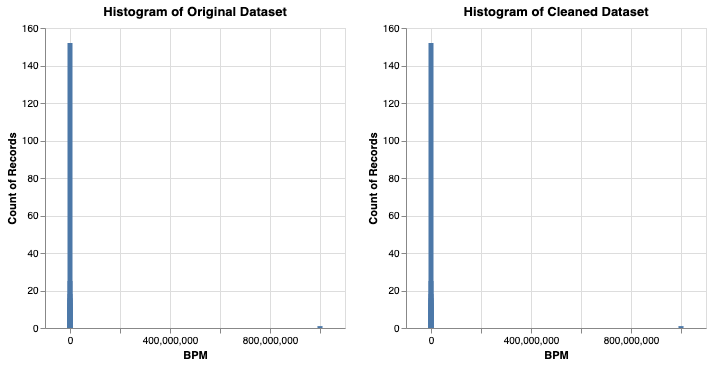

In [8]:
bpm_dist = alt.Chart(mxmh).mark_bar().encode(alt.X("BPM:Q"), alt.Y("count()")).properties(
    title="Histogram of Original Dataset",
    height = 300,
    width = 300
)

bpm_dist_clean = alt.Chart(mxmh_clean).mark_bar().encode(alt.X("BPM:Q"), alt.Y("count()")).properties(
    title="Histogram of Cleaned Dataset",
    height = 300,
    width = 300
)

alt.hconcat(bpm_dist, bpm_dist_clean)

Clearly, someone is trolling here. Let's see the range for BPM.

In [9]:
mxmh[["BPM"]].describe()

,BPM
count,7.360000e+02
mean,1.358818e+06
std,3.686048e+07
min,0.000000e+00
25%,1.050000e+02
50%,1.200000e+02
75%,1.400000e+02
max,1.000000e+09


The 25th and 75th percentiles for BPM is 100 to 140, so let's cut off unreasonable values.

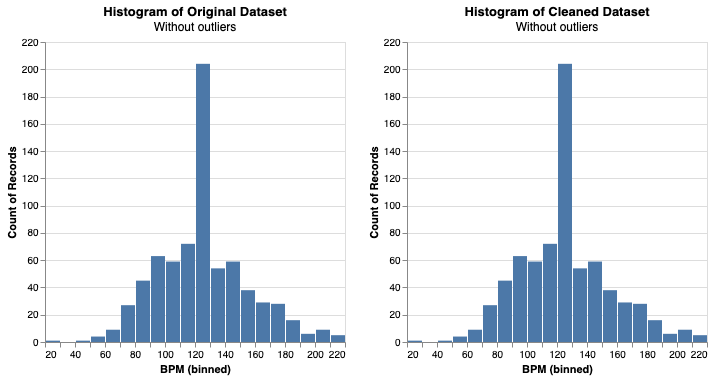

In [10]:
bpm_dist_noOutliers = alt.Chart(
    mxmh[(mxmh["BPM"] < 500) & (mxmh["BPM"] > 10)]
).mark_bar().encode(
    alt.X("BPM:Q", bin=alt.Bin(maxbins=30)), 
    alt.Y("count()")
).properties(
    title=alt.Title("Histogram of Original Dataset",
    subtitle="Without outliers"),
    height = 300,
    width = 300
)

bpm_dist_clean_noOutliers = alt.Chart(
    mxmh_clean[(mxmh_clean["BPM"] < 500) & (mxmh_clean["BPM"] > 10)]
).mark_bar().encode(
    alt.X("BPM:Q", bin=alt.Bin(maxbins=30)),
    alt.Y("count()")
).properties(
    title=alt.Title("Histogram of Cleaned Dataset",
    subtitle="Without outliers"),
    height = 300,
    width = 300,

)

alt.hconcat(bpm_dist_noOutliers, bpm_dist_clean_noOutliers)

Imputing BPM with the median does not skew the data distribution.

Given our research question, we may not need all columns.

The `Permissions` seems to be irrelevent here - let's check.

In [11]:
mxmh['Permissions'].nunique()

1

In [12]:
mxmh['Permissions'].unique()

array(['I understand.'], dtype=object)

In [13]:
mxmh[['Permissions']].isnull().sum()

Permissions    0
dtype: int64

Since there is only one value, and no one failed to provide their permission, I will keep all entries but remove this column.

In [14]:
# Drop original Timestamp column
mxmh_clean = mxmh.drop(columns=["Permissions"])

For this research question, I also want to divide `Timestamp` into `Date` and `Time`, and add a column `Time of Day` to see if there are any periodic patterns later.

In [15]:
mxmh_clean["Timestamp"] = pd.to_datetime(mxmh["Timestamp"])
mxmh_clean["Date"] = pd.to_datetime(mxmh["Timestamp"].dt.date)
mxmh_clean["Time"] = mxmh["Timestamp"].dt.strftime("%H:%M:%S")

In [16]:
time_order = ["Morning", "Afternoon", "Evening", "Night"]

def categorize_time_of_day(timestamp):
    hour = timestamp.hour
    if 6 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 18:
        return "Afternoon"
    elif 18 <= hour < 24:
        return "Evening"
    else:
        return "Night"

# Apply time of day categorization
mxmh_clean["Time of Day"] = mxmh_clean["Timestamp"].apply(categorize_time_of_day)

# Convert to categorical type with order
mxmh_clean["Time of Day"] = pd.Categorical(mxmh_clean["Time of Day"], categories=time_order, ordered=True)

In [17]:
mxmh_clean.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Date,Time,Time of Day
0,2022-08-27 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Never,Sometimes,3.0,0.0,1.0,0.0,No response,2022-08-27,19:29:02,Evening
1,2022-08-27 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Very frequently,Rarely,7.0,2.0,2.0,1.0,No response,2022-08-27,19:57:31,Evening
2,2022-08-27 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,2022-08-27,21:28:18,Evening
3,2022-08-27 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Never,Never,9.0,7.0,3.0,3.0,Improve,2022-08-27,21:40:40,Evening
4,2022-08-27 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Never,Rarely,7.0,2.0,5.0,9.0,Improve,2022-08-27,21:54:47,Evening


In [18]:
mxmh_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Timestamp                     736 non-null    datetime64[ns]
 1   Age                           736 non-null    float64       
 2   Primary streaming service     736 non-null    object        
 3   Hours per day                 736 non-null    float64       
 4   While working                 736 non-null    object        
 5   Instrumentalist               736 non-null    object        
 6   Composer                      736 non-null    object        
 7   Fav genre                     736 non-null    object        
 8   Exploratory                   736 non-null    object        
 9   Foreign languages             736 non-null    object        
 10  BPM                           736 non-null    float64       
 11  Frequency [Classical]         73

Now, our dataset looks ready for EDA!

## 3. Exploratory Data Analysis (EDA)

### *General EDA*

In [19]:
mxmh.shape

(736, 33)

In [20]:
mxmh_clean.shape

(736, 35)

The clean dataset has more columns but the same number of rows.

In [21]:
mxmh_clean.describe()

,Timestamp,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD,Date
count,736,736.000000,736.000000,7.360000e+02,736.000000,736.000000,736.000000,736.000000,736
mean,2022-09-03 19:54:51.849184768,25.201087,3.572758,1.358818e+06,5.837636,4.796196,3.738451,2.637228,2022-09-03 05:56:05.217391104
min,2022-08-27 19:29:02,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2022-08-27 00:00:00
25%,2022-08-28 19:58:27.249999872,18.000000,2.000000,1.050000e+02,4.000000,2.000000,1.000000,0.000000,2022-08-28 00:00:00
50%,2022-08-29 13:41:45.500000,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000,2022-08-29 00:00:00
75%,2022-09-03 17:26:35.500000,28.000000,5.000000,1.400000e+02,8.000000,7.000000,6.000000,5.000000,2022-09-03 00:00:00
max,2022-11-09 01:55:20,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000,2022-11-09 00:00:00
std,NaN,12.047764,3.028199,3.686048e+07,2.793054,3.028870,3.088689,2.842017,NaN


This table informs us of some summary statistics on the quantitative columns.

It appears that the survey window was from Aug 27, 2022 to Nov 11, 2022. 
The median (range) age of respondents was 21 (10-89) years, with 3 (0-24) hours of music listening per day. Anxiety was the most severe on average. Many respondents have high levels of self-reported anxiety. Respondents also vary in self-reported depression severity. Insomnia and Obsessive Compulsive Disorder are mostly low or mild in these respondents. 

In [22]:
quant_dist = alt.Chart(mxmh_clean).mark_bar().encode(
            alt.X(alt.repeat(), bin=alt.BinParams(maxbins=30)),
            alt.Y('count()', title='Frequency')
).repeat(
    ["Age", "Hours per day"]
).properties(title="Histograms of Quantitative Non-Mental Health Variables")

# quant_dist

In [23]:
colors = ['tomato', 'grey', 'mediumseagreen']

work_pie = alt.Chart(mxmh_clean).mark_arc().encode(
            alt.Color('While working', title='Listens While Working', scale=alt.Scale(range=colors)).legend(orient="left", title=None),
            alt.Theta('count()', title='Count')
).properties(
    title='Listen to music while working',
    width=150
)

instru_pie = alt.Chart(mxmh_clean).mark_arc().encode(
            alt.Color('Instrumentalist', title='Plays an Instrument', scale=alt.Scale(range=colors)),
            alt.Theta('count()', title='Count')
).properties(
    title='Plays an instrument regularly',
    width=150)

composer_pie = alt.Chart(mxmh_clean).mark_arc().encode(
            alt.Color('Composer', title='Composes Music', scale=alt.Scale(range=colors)),
            alt.Theta('count()', title='Count')
).properties(title='Does the respondent compose music?',
    width=150)

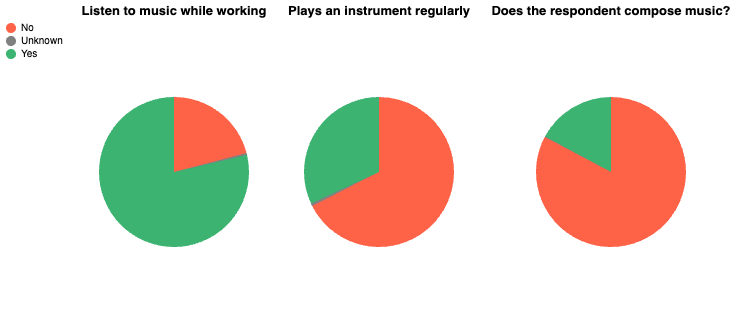

In [24]:
alt.hconcat(work_pie, instru_pie, composer_pie)

Seems like most respondents listen to music while working, but most do not play an instrument and even more do not compose their own music.

In [25]:
genre_dist = alt.Chart(mxmh_clean).mark_bar().encode(
            alt.Y('Fav genre', sort="-x", title='Genre'),
            alt.X('count()', title='Count')
).properties(title="Respondents' favourite genre")

In [26]:
explore_dist = alt.Chart(mxmh_clean).mark_bar().encode(
    alt.Y('Exploratory', title=""),
    alt.X('count()', title='Count'),
    alt.Color('Exploratory', scale=alt.Scale(range=colors))
).properties(
    title='Does the respondent actively explore new artists/genres?'
)

In [27]:
foreign_lang_dist = alt.Chart(mxmh_clean).mark_bar().encode(
    alt.Y('Foreign languages', title=""),
    alt.X('count()', title='Count'),
    alt.Color('Foreign languages', scale=alt.Scale(range=colors))
).properties(
    title='Does the respondent listen to music in a foreign language?'
)

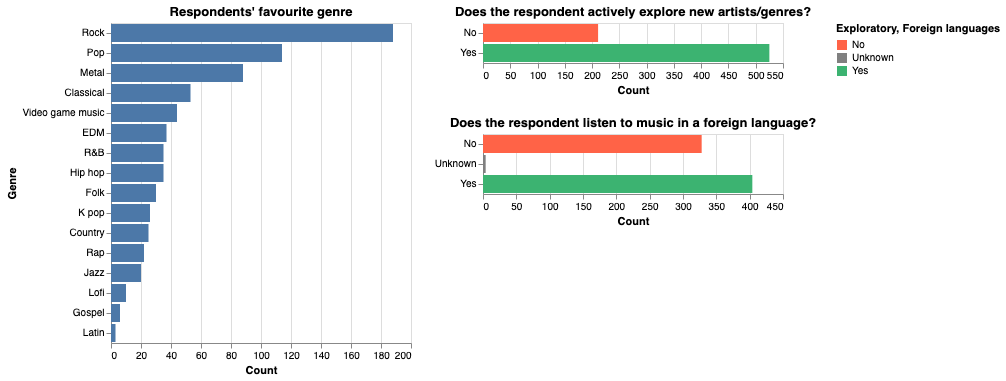

In [28]:
genre_dist | explore_dist & foreign_lang_dist

Rock, Pop and Metal are the most frequently listened to genres. Most respondents explore new genres and a little over half listen to msic they are not fluent in.

In [29]:
mho_dist = alt.Chart(mxmh).mark_bar().encode(
                     alt.X(alt.repeat(), bin=alt.BinParams(maxbins=15), type = 'quantitative'),
                    alt.Y('count():Q', title='Count')
                    ).properties(height=150).repeat(['Anxiety', 'Depression', 'Insomnia', 'OCD'], columns=2)
# mho_dist

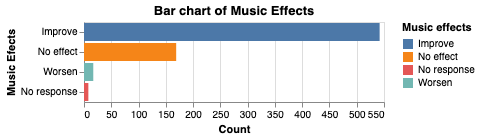

In [30]:
music_effects_dist = alt.Chart(mxmh).mark_bar().encode(
            alt.Y('Music effects', sort="-x", title='Music Efects'),
            alt.X('count()', title='Count'),
    alt.Color("Music effects")
).properties(title='Bar chart of Music Effects')
music_effects_dist

Seems like most people think music improves mental health!

### *`Timestamp` Specific EDA*

Since we are interested in how the Time of Survey Response (Timestamp) effects the survey responses, we want to know what the range is for the `Timestamp` column.

In [31]:
mxmh["Timestamp"].min()

Timestamp('2022-08-27 19:29:02')

In [32]:
mxmh["Timestamp"].max()

Timestamp('2022-11-09 01:55:20')

In [33]:
mxmh["Timestamp"].max() - mxmh["Timestamp"].min()

Timedelta('73 days 06:26:18')

Based on above, we can see that responses came in over approximately 73 days.

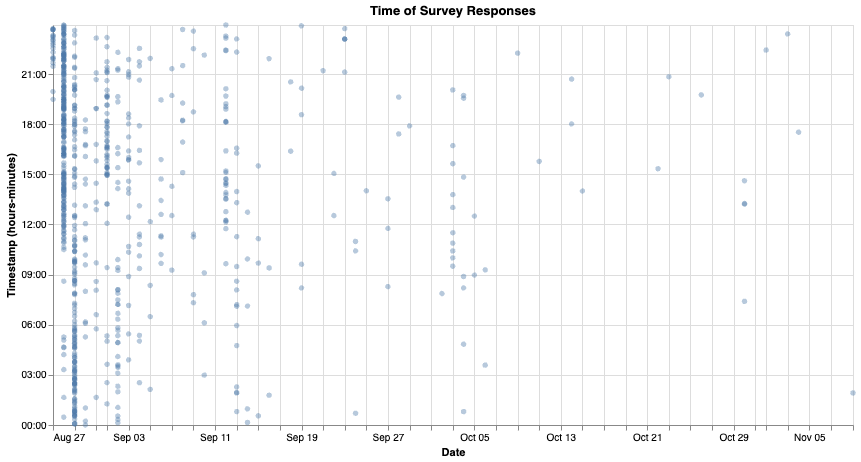

In [34]:
date_vs_time = alt.Chart(mxmh_clean).mark_circle(opacity=.40).encode(
    alt.Y("hoursminutes(Timestamp):T").axis(format="%H:%M"),
    alt.X("Date:T").axis(format="%b %d")
).properties(title="Time of Survey Responses", width=800, height=400)

date_vs_time

The figure above and below shows that most responses occurred in the first week of the survey opening.

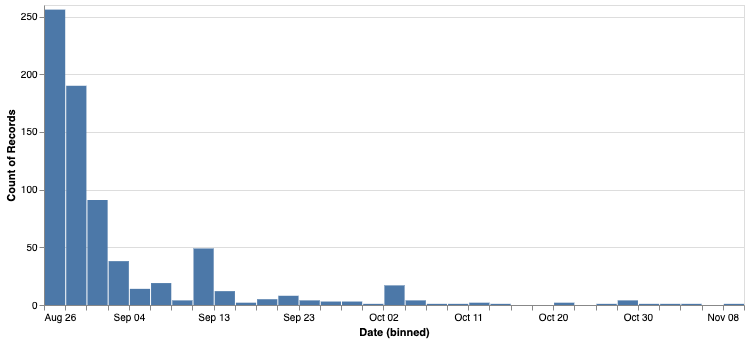

In [35]:
date_dist = alt.Chart(mxmh_clean).mark_bar().encode(
    alt.X("Date:T", bin=alt.BinParams(maxbins=40)).axis(format='%b %d'),
    alt.Y("count()")
).transform_timeunit(
    Date='monthdate(Date)'
).properties(width=700)

date_dist

A burst of people responded around Sep 13 and Oct 2nd!

In [36]:
tod_hist = alt.Chart(mxmh_clean).mark_bar().encode(
    alt.Y("Time of Day:O", title="Time of Day", sort=time_order),
    alt.X("count()", title="Count"),
    alt.Color("Time of Day:O", sort=time_order),
    tooltip=["count()"],
).properties(title="Time of Day when Survey was Submitted")

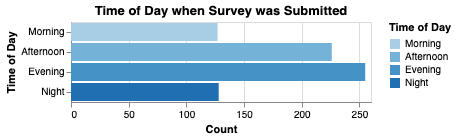

In [37]:
tod_hist

Most people responded in the evening (6pm-12pm) or afternoon (12pm-6pm), but this may be biased due to when the survey was released. 

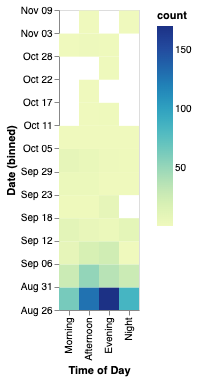

In [38]:
alt.Chart(mxmh_clean).mark_rect().encode(
    alt.X("Time of Day:O", title="Time of Day", sort=time_order),
    alt.Y("Date:T", bin=alt.BinParams(maxbins=20)).axis(format='%b %d'),
    alt.Color('count()').title('count')
)

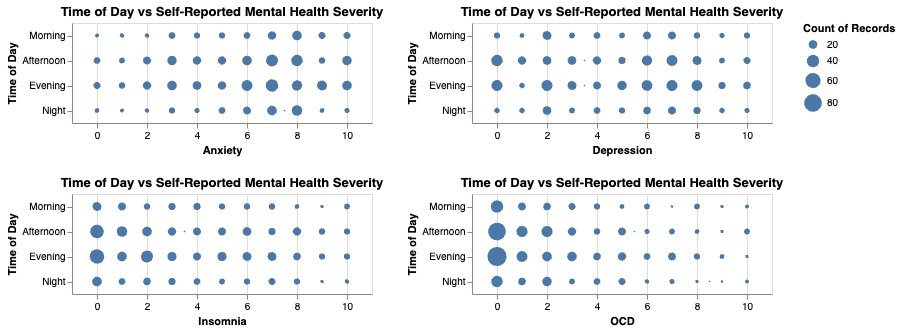

In [39]:
tod_mh = alt.Chart(mxmh_clean).mark_circle().encode(
    alt.Y('Time of Day:O', title="Time of Day", sort=time_order),
    alt.X(alt.repeat(), type='quantitative', scale=alt.Scale(domain=[-1,11])),
    alt.Size("count()"),
    tooltip=alt.Tooltip(["count()"])
).properties(
    height=100, width=300, title="Time of Day vs Self-Reported Mental Health Severity"
).repeat(['Anxiety', 'Depression', 'Insomnia', 'OCD'], columns=2)
tod_mh

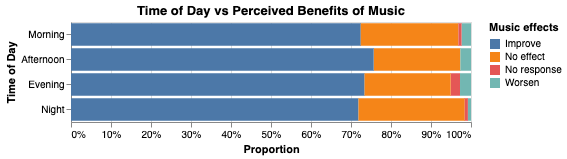

In [40]:
tod_effects = alt.Chart(mxmh_clean).mark_bar().encode(
    alt.Y('Time of Day:O', title="Time of Day", sort=time_order),
    alt.X("count()", title="Proportion").stack("normalize"),
    alt.Color("Music effects"),
    tooltip=alt.Tooltip(["count()"])
).properties(
    height=100, width=400, title="Time of Day vs Perceived Benefits of Music"
)

tod_effects

The figures above show us that there seem to be no distinct or interesting variations in mental health severity or perceive benefits of music based on time of day most respondents submitted their survey within 24 hours of the survey opening. 

As this EDA came to a wall, I will pivot my overarching research question to look at response biases in self-reported mental health scores.

## Part 2: How does response bias play a role in self-reported mental health scores?

This survey is comprised of anonymous, self-reported responses. One key concern in self-reported surveys is **response bias**, where individuals may exaggerate, underreport, or misrepresent themselves due to social desirability, misunderstanding of scales, or even intentional trolling. This bias can lead to skewed distributions, extreme values, and inconsistencies that impact the validity of conclusions drawn from the data. By analyzing response patterns, identifying outliers, and exploring demographic influences, we can better assess the reliability of self-reported mental health scores and develop strategies for data validation.

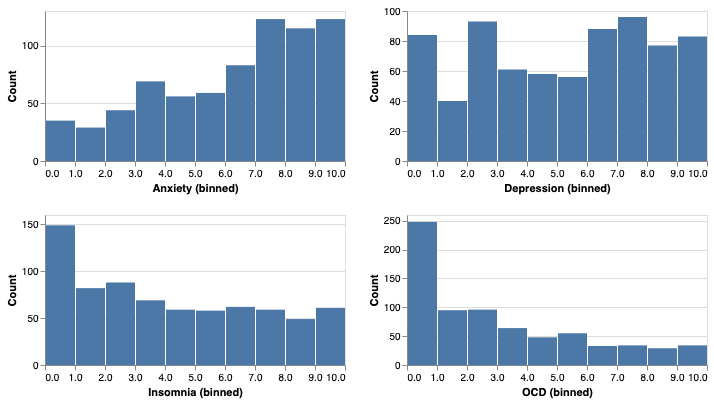

In [41]:
mho_distributions = alt.Chart(mxmh_clean).mark_bar().encode(
                     alt.X(alt.repeat(), bin=alt.BinParams(maxbins=15), type = 'quantitative'),
                    alt.Y('count():Q', title='Count')
                    ).properties(height=150).repeat(['Anxiety', 'Depression', 'Insomnia', 'OCD'], columns=2)
mho_distributions

Based on the above, we can see the differences in distributions across the various mental health domains that the survey looked at. We can see that Anxiety has a left-skew, while Depression has a 2-3 different peaks, and both insomnia and OCD are right-skewed.

The graph below explores these further by comparing the mental health scores with each other.

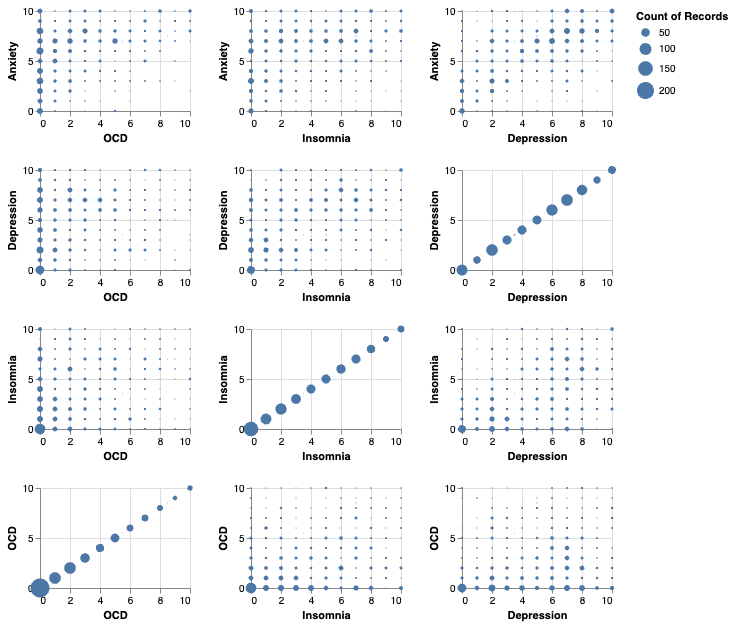

In [42]:
alt.Chart().mark_circle().encode(
  alt.X(alt.repeat('column'), type='quantitative'),
  alt.Y(alt.repeat('row'), type='quantitative'),
    alt.Size("count()")
).properties(
  width=150,
  height=100
).repeat(
  data=mxmh_clean,
  row=['Anxiety', 'Depression', 'Insomnia', 'OCD'],
  column=['OCD', 'Insomnia', 'Depression']
)

Based on the scatter matrix above, we can see that that it's relatively rare for someone to have low anxiety + high OCD, low anxiety + high insomnia, and low anxiety + high depression or vice versa. In general, it is rare for people to have high insomnia or high OCD or both high OCD and insomnia. Of those who have high insomnia, it seems that it's rare to have high insomnia and low depression.

# Creating Final Visualizations

In [43]:
# !pip install altair_saver --quiet

## Loading dependencies/libraries

In [44]:
import sys
import os
import altair as alt
import pandas as pd
from toolz.curried import pipe
from altair_saver import save

# # Create a new data transformer that stores the files in a directory
def json_dir(data, data_dir='altairdata'):
    os.makedirs(data_dir, exist_ok=True)
    return pipe(data, alt.to_json(filename=data_dir + '/{prefix}-{hash}.{extension}') )

# # Register and enable the new transformer
alt.data_transformers.register('json_dir', json_dir)
alt.data_transformers.enable('json_dir')

sys.path.append('../..')
from scripts import wrangle_and_clean as wac

# Handle large data sets (default shows only 5000)
# See here: https://altair-viz.github.io/user_guide/data_transformers.html
alt.data_transformers.disable_max_rows()

alt.renderers.enable('jupyterlab')

RendererRegistry.enable('jupyterlab')

## Load & Wrangle Data

In [45]:
path = "../../data/raw/mxmh_survey_results.csv"

In [46]:
mxmh = wac.clean_data(path)
# mxmh.head()

In [47]:
mxmh_scores = mxmh.melt(id_vars=["Timestamp", "Age", "Music effects"], 
                     value_vars=["Anxiety", "Depression", "Insomnia", "OCD"], 
                     var_name="Mental Health Condition", 
                     value_name="Self-report Score")

music_effects_ordered = ['Improve', 'No effect', 'Worsen', 'No response']

mxmh_scores["Music effects"] = pd.Categorical(mxmh_scores["Music effects"], 
                                              categories=music_effects_ordered, 
                                              ordered=True)

music_effects_map = {"Improve": 1, "No effect": 2, "Worsen": 3, "No response":4}
mxmh_scores["Music effects (ordered)"] = mxmh_scores["Music effects"].map(music_effects_map)

## Aesthetic Settings

In [48]:
# === COLOR PALETTE === #
okabe_ito_palette = [
    "#009E73",  # Green
    "#0072B2",  # Blue
    "#56B4E9",  # Sky Blue
    "#F0E442",  # Yellow
    "#E69F00",  # Orange
    "#D55E00",  # Vermillion
    "#CC79A7",  # Pink
    '#23338A',  # Dark Blue [colour blind safe addition]
]

### === Color and Order for Music Effects === ###
music_effects_ordered = ['Improve', 'No effect', 'Worsen', 'No response']
effect_colors = ["#009E73", "#F0E442", "#E69F00", "grey"]
effect_color_scale = alt.Scale(domain=music_effects_ordered, range=effect_colors)

### === Color and Order for Mental Health === ###
mental_health_ordered = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
health_colors = ["#009E73", "#23338A", "#E69F00", "#F0E442"]
health_color_scale = alt.Scale(domain=mental_health_ordered, range=health_colors)

In [49]:
# === FONT SETTING ===
font_choice = "Segoe UI"

legend_configuration = {"titleFontSize": 15,
    "labelFontSize": 15,
    "fillColor": '#F5F5F5',
    "padding": 10,
    "cornerRadius": 10,
    "labelFont": font_choice,
    "labelSeparation": 5,
    "titleFont": font_choice,
    "titleLimit": 240
}

title_configuration = {
    "fontSize": 25,
    "anchor": "middle", 
    "font": font_choice,
    "subtitlePadding": 10,
    "subtitleFont": font_choice,
    "subtitleColor": "grey10",
    "subtitleFontSize": 17
}

axis_configuration = {
    "labelFont": font_choice,
    "titleFont": font_choice,
    "labelFontSize": 15,
    "titleFontSize": 18
}

header_configuration = {
    "labelFont": font_choice,
    "titleFont": font_choice,
    "labelFontSize": 15,
    "titleFontSize": 18
}

## Question 1: What is the distribution of self-reported mental health scores based on opinions of music on mental health?

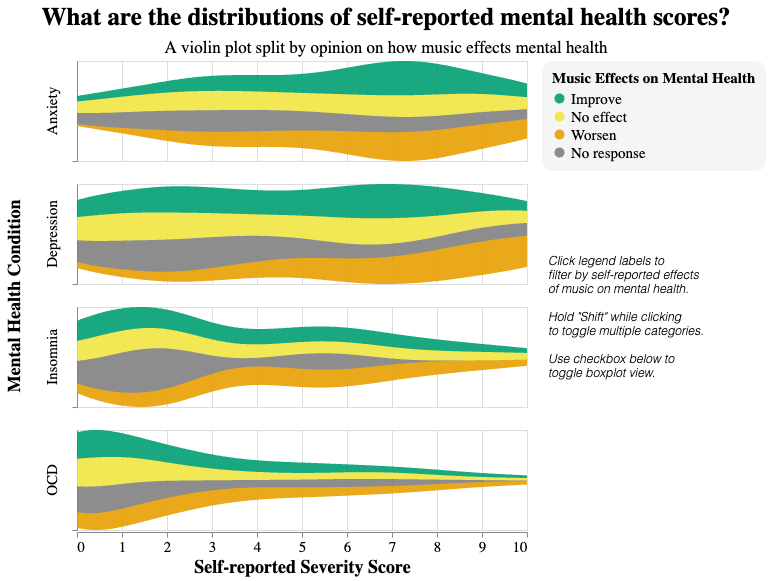

In [50]:
### WIDGETS ###
selection = alt.selection_point(fields=["Music effects"], bind="legend", empty=True)

bind_checkbox = alt.binding_checkbox(name="Show Boxplot: ")
param_checkbox = alt.param(bind=bind_checkbox)

### BOX PLOT ###
boxplot = (
    alt.Chart(mxmh_scores)
    .mark_boxplot(color="black", opacity=0.4, size=30)
    .encode(
        alt.X("Self-report Score:Q", title="Self-reported Severity Score"),
        opacity=alt.when(param_checkbox).then(alt.value(0.7)).otherwise(alt.value(0)),
    )
    .add_params(param_checkbox)
    .properties(width=450)
)

### VIOLIN PLOT ###
violin = (
    alt.Chart(mxmh_scores)
    .transform_density(
        "Self-report Score",
        as_=["Self-report Score", "density"],
        extent=[0, 10],
        groupby=["Mental Health Condition:N", "Music effects"],
    )
    .mark_area(opacity=0.9, orient="vertical", interpolate="monotone", tooltip=True)
    .encode(
        x=alt.X("Self-report Score:Q", title="Self-reported Severity Score"),
        y=alt.Y(
            "density:Q",
            stack="center",
            impute=None,
            title=None,
            scale=alt.Scale(
                nice=False,
                zero=True,
            ),
            axis=alt.Axis(labels=False, values=[0], grid=False, ticks=True),
        ),
        color=alt.condition(
            selection,
            alt.Color(
                "Music effects:O",
                title="Music Effects on Mental Health",
                scale=effect_color_scale,
                legend=alt.Legend(orient='none',legendX=465, legendY=0)
            ),
            alt.value("lightgrey"),
        ),
    )
    .properties(width=450, height=100)
    .add_params(selection)
)

### === NOTE === ###
note = alt.Chart({'values': [{}]}).mark_text(
    text=[
        'Click legend labels to', 'filter by self-reported effects', ' of music on mental health.', '',
        'Hold "Shift" while clicking', 'to toggle multiple categories.', '', 
        'Use checkbox below to ', 'toggle boxplot view.',
    ],
    align='left',
    baseline='middle',
    fontSize=12,
    y=200,
    x=-100,
    fontWeight='lighter',
    fontStyle= 'italic',
)

### FINAL CHART 1 ###
chart1 = (
    alt.layer(violin, boxplot)
    .facet(row=alt.Row("Mental Health Condition"))
    .resolve_scale(y=alt.ResolveMode("independent"))
)
chart1

final_chart1 = (alt.hconcat(chart1, note
).properties(
        title={
            "text": [
                "What are the distributions of self-reported mental health scores?",
                # "...",
            ],
            "subtitle": [
                "A violin plot split by opinion on how music effects mental health"
            ],
        }
    )
).configure_legend(
    **legend_configuration
).configure_title(
    **title_configuration
).configure_axis(
    **axis_configuration
).configure_header(
    **header_configuration
)

final_chart1



---




**Summary of tasks:**

This visualization was designed to get an overview of the **distribution** of the self-reported mental health scores, split by a self-reported score of whether music `Improves`, has `No effect`, or `Worsens` mental health (or they did not respond). Summarize the tasks it was designed to address and how/whether the visualizations you chose accomplish (or not accomplish) that task.


## Question 2: What are the response patterns for self-reported mental health?

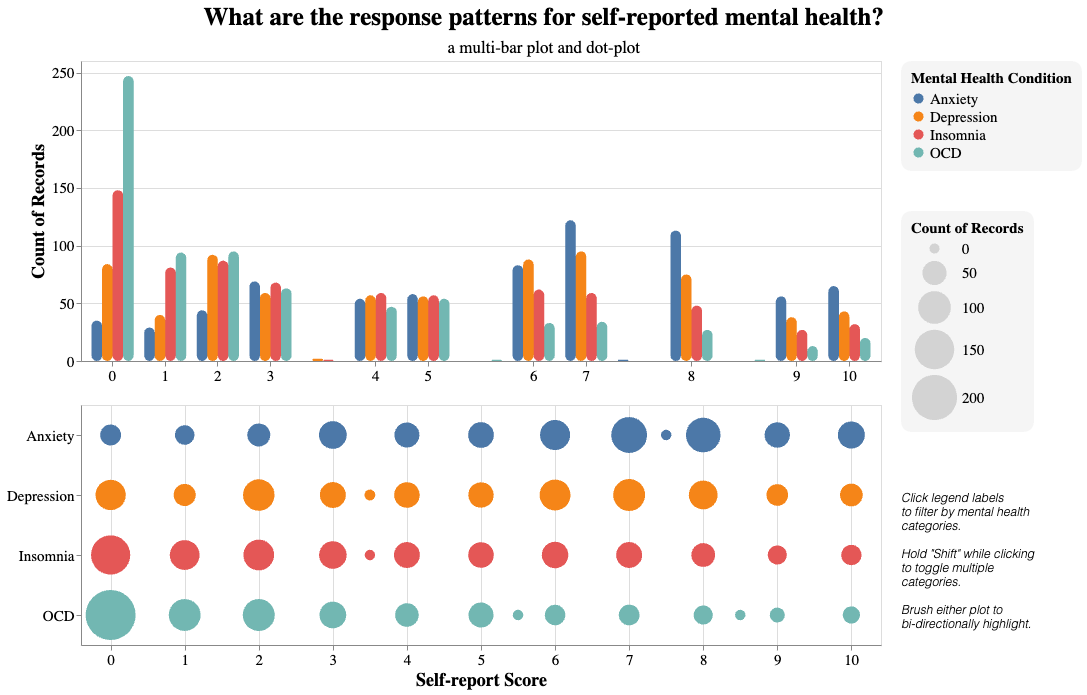

In [51]:
### === Interactions === ###
brush = alt.selection_interval()
selection = alt.selection_point(fields=['Mental Health Condition'], bind='legend')


### === Multi-bar Plot === ###
multibar = alt.Chart(mxmh_scores).add_params(
    brush, selection
).mark_bar(cornerRadius=7).encode(
    x=alt.X('Self-report Score:O', title=None).axis(labelAngle=0, tickMinStep=0.5, values=list(range(0, 11, 1))),
    xOffset="Mental Health Condition:N",
    y='count():Q',
    opacity = alt.condition(selection, alt.value(1), alt.value(0)), 
    color=alt.when(brush).then(alt.Color("Mental Health Condition:N",
                                         legend=alt.Legend(orient='none',
                                                           legendX=820,
                                                           legendY=0))
                              ).otherwise(alt.value("lightgray")),
    tooltip=["Mental Health Condition", 'Self-report Score:O', "count()"]
).properties(width=800, height=300)

### === DOT-PLOT === ###
dotplot = alt.Chart(mxmh_scores).add_params(
    brush, selection
).mark_circle(opacity=0.8).encode(
    x=alt.X('Self-report Score', title="Self-report Score", scale=alt.Scale(domain=[-0.4, 10.4])).axis(tickMinStep=0.5, values=list(range(0, 11, 1))),
    y=alt.Y('Mental Health Condition:N', title=None),
    color=alt.when(brush).then("Mental Health Condition:N").otherwise(alt.value("lightgray")),
    opacity = alt.condition(selection, alt.value(1), alt.value(0)), 
    size = alt.Size("count():Q", scale=alt.Scale(rangeMin=100, rangeMax=2500),
                    legend=alt.Legend(orient='none',
                                      legendX=820,
                                      legendY=150)
                   ),
    tooltip=["Mental Health Condition", "Self-report Score", "count()"]
).properties(width=800, height=240)

### === NOTE === ###
note = alt.Chart({'values': [{}]}).mark_text(
    text=[
        'Click legend labels ', 'to filter by mental health',
        'categories.', '',
        'Hold "Shift" while clicking', 'to toggle multiple', ' categories.', '', 
        'Brush either plot to ', 'bi-directionally highlight.',
    ],
    align='left',
    baseline='bottom',
    fontSize=12,
    y=100,
    x=820,
    fontWeight='lighter',
    fontStyle= 'italic',
)

### === DOT-PLOT & NOTE === ###
dotplot_note = alt.layer(dotplot, note)

### === FINAL CHART #2 ===###
chart2 = alt.vconcat(multibar, dotplot_note
).properties(
    title={
        "text": ["What are the response patterns for self-reported mental health?"],
        "subtitle": ["a multi-bar plot and dot-plot"]
    }
).resolve_scale(
    x='shared'
).configure_legend(
    **legend_configuration
).configure_title(
    **title_configuration
).configure_axis(
    **axis_configuration
).configure_header(
    **header_configuration
)

chart2.show()

- For the visualization below, select the **Mental Health Condition** to look at a condition of interest.
- Use `shift` + click to select multiple categories.

For the visualization below, drag your cursor across the screen to highlight sections of the histogram and dot-chart.

## Question 3: Can we group individuals into clusters based on their music preferences and mental health scores?

In [52]:
import numpy as np


In [53]:
mxmh_raw = pd.read_csv(path)

mxmh_jess_q3 = mxmh_raw
mxmh_jess_q3['Music effects'] = mxmh_jess_q3['Music effects'].fillna("No response")

bpmMax = mxmh_raw["BPM"].nlargest(2).index
bpmMin = mxmh_raw["BPM"].nsmallest(5).index
bpmOutliers = bpmMax.union(bpmMin)
mxmh_jess_q3["BPM_cleaned"] = mxmh_jess_q3["BPM"]
# mxmh_jess_q3.loc[bpmMax, "BPM_cleaned"] = 300  # Set top 2 highest values
mxmh_jess_q3.loc[bpmMax, "BPM_cleaned"] = np.nan  # Set top 2 highest values to NAN
# mxmh_jess_q3.loc[bpmMin, "BPM_cleaned"] = 15   # Set bottom 5 lowest values
mxmh_jess_q3.loc[bpmMin, "BPM_cleaned"] = np.nan   # Set bottom 5 lowest values to NAN


mxmh_jess_q3[["BPM_cleaned"]].describe()

# music_effects_map = {"Improve": 1, "No effect": 2, "Worsen": 3, "No response":4}
# mxmh_jess_q3["Music effects"] = mxmh_jess_q3["Music effects"].map(music_effects_map)

music_effects_ordered = ['Improve', 'No effect', 'Worsen', 'No response']
mxmh_jess_q3["Music effects"] = pd.Categorical(mxmh_jess_q3["Music effects"], 
                                              categories=music_effects_ordered, 
                                              ordered=True)

mxmh_jess_q3.reset_index(inplace=True)
mxmh_jess_q3.rename(columns={'index': 'ID'}, inplace=True)
# mxmh_jess_q3

### 3.1

In [54]:
label_data = pd.DataFrame({
    "value": ["Age", "BPM", "BPM_cleaned", "Hours per day"],
    "label": [
        "Age", 
        "BPM (with outliers)", 
        "BPM (no outliers)", 
        "Hours per day"
    ]
})

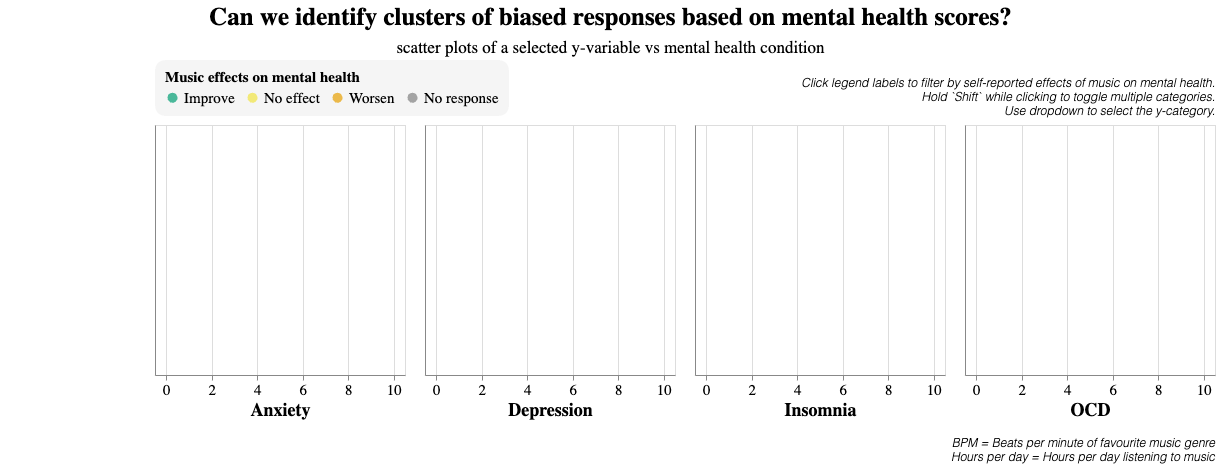

In [55]:
### === WIDGETS & INTERACTIONS === ###

# === Y COLUMN DROP-DOWN ===
dropdown_y = alt.binding_select(
    options=["Age", "BPM", "BPM_cleaned", "Hours per day"], 
    labels=[
        "Age", 
        "BPM (with outliers)", 
        "BPM (no outliers)", 
        "Hours per day"],
    name="Y-axis column: "
)
ycol_param = alt.param(bind=dropdown_y)
# y_axis_selection = alt.binding_select(options=['Age', 'BPM'], name='Y-axis column: ')
# y_axis_variable = alt.param(bind=y_axis_selection, value='Age')

# === INTERACTIONS ===
click = alt.selection_point(empty=False)
hover = alt.selection_point(on="mouseover", empty=False)
brush = alt.selection_interval()

# === filter music effects column ===
selection_me = alt.selection_point(fields=["Music effects"], bind="legend")

### BASE CHART ###
chart3 = (
    alt.Chart(mxmh_jess_q3)
    .mark_circle(opacity=0.7)
    .encode(
        x=alt.X(scale=alt.Scale(domain=[-0.5, 10.5])),
        y=alt.Y("y:Q", title=None),
        color=alt.when(brush)
        .then(alt.Color("Music effects:N", 
                        title="Music effects on mental health", 
                        scale=effect_color_scale, 
                        sort=['Improve', 'No effect', 'Worsen', 'No response']))
        .otherwise(alt.value("lightgray")),
        tooltip=alt.Tooltip(
            ["ID", "Age", "Anxiety", "Depression", "Insomnia", "OCD", "Music effects"]
        ),
        size=alt.when(hover).then(alt.value(800)),
        # opacity=alt.when(selection_me).then(alt.value(0.7)).otherwise(alt.value(0.01)),
    )
    # .properties(width=250, height=250)
    .transform_calculate(
        y=f"datum[{ycol_param.name}]",
    )
    .transform_filter(
        selection_me
    )
    .add_params(hover, brush, ycol_param, selection_me)
)

### === LEFT AXIS CHANGES WITH DROPDOWN === ###
text = (
    alt.Chart(label_data)
    .mark_text(
        align="center",
        angle=270,
        baseline='bottom',  # bottom, middle, top
        fontSize=15,
        fontWeight="bold",
        font=font_choice
    )
    .transform_filter(f"datum.value === {ycol_param.name}")
    .transform_calculate(
        custom_label='datum.label'
    )
    .encode(
        text="custom_label:N"
    )
    .add_params(ycol_param)
    .properties(
        width=130,
        height=250
    )
)

### ANXIETY CHART ###
chart3_anx = chart3.encode(
    x=alt.X("Anxiety:Q", scale=alt.Scale(domain=[-0.5, 10.5])),
    y=alt.Y("y:Q", title=None)
).properties(width=250, height=250)
### DEPRESSION CHART ###
chart3_dep = chart3.encode(
    x=alt.X("Depression:Q", scale=alt.Scale(domain=[-0.5, 10.5])),
    y=alt.Y("y:Q", axis=alt.Axis(labels=False, ticks=False, title=None))
).properties(width=250, height=250)
### INSOMNIA CHART ###
chart3_ins = chart3.encode(
    x=alt.X("Insomnia:Q", scale=alt.Scale(domain=[-0.5, 10.5])),
    y=alt.Y("y:Q", axis=alt.Axis(labels=False, ticks=False, title=None))
).properties(width=250, height=250)
### OCD CHART ###
chart3_ocd = chart3.encode(
    x=alt.X("OCD:Q", scale=alt.Scale(domain=[-0.5, 10.5])),
    y=alt.Y("y:Q", axis=alt.Axis(labels=False, ticks=False, title=None))
).properties(width=250, height=250)


### === NOTE === ###
note = alt.Chart({"values": [{}]}).mark_text(
    text=[
        "Click legend labels to filter by self-reported effects of music on mental health.",
        "Hold `Shift` while clicking to toggle multiple categories.",
        "Use dropdown to select the y-category.",
        "  ",
    ],
    align="right",
    baseline="bottom", # bottom, middle, top
    fontSize=12,
    fontWeight="lighter",
    fontStyle="italic",
    dx=1170,
    dy=-60
).properties(
    width=80,
    height=50
)

### === BPM NOTE === ###
note_bpm = alt.Chart({"values": [{}]}).mark_text(
    text=[
        "BPM = Beats per minute of favourite music genre",
        "Hours per day = Hours per day listening to music",
    ],
    align="right",
    baseline="bottom", # bottom, middle, top
    fontSize=12,
    fontWeight="lighter",
    fontStyle="italic",
    dx=1170,
    dy=250
).properties(
    width=80,
    height=50
)

### FINAL VIZ ###
# chart3_all =  

chart3_final = (
    alt.vconcat(
        alt.hconcat(text, chart3_anx, chart3_dep, chart3_ins, chart3_ocd).properties(
            bounds="flush"
        ),
        note,
        note_bpm,
    )
    .properties(bounds="flush")
    # .resolve_scale(x="shared", y="shared")
    .configure_legend(
        direction="horizontal",
        orient="none",
        legendX=150,
        legendY=-65,
        **legend_configuration,
    )
    .configure_title(**title_configuration)
    .configure_axis(**axis_configuration)
    .configure_header(**header_configuration)
).properties(
    title={
        "text": ["Can we identify clusters of biased responses based on mental health scores?"],
        "subtitle": [
            "scatter plots of a selected y-variable vs mental health condition"
        ],
    },
    spacing=0,
)
chart3_final

# Dashboard

In [56]:
final_chart1.save('./outputs/jess_chart1.html')
chart2.save('./outputs/jess_chart2.html')
chart3_final.save('./outputs/jess_chart3.html')